## Problem 1: The Curse of Dimensionality; or why self driving cars are hard.

### 1a) Sampling in low dimensions

Generate a sample of 100 randomly distributed points inside a 2D square. 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

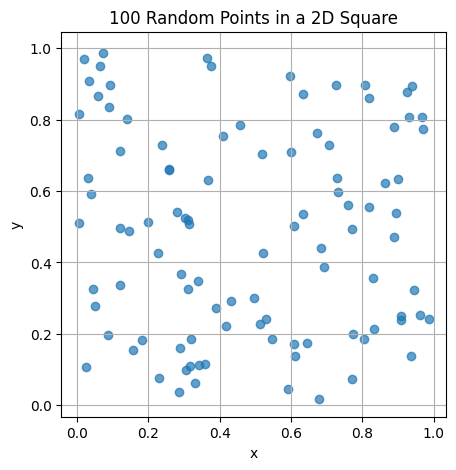

In [4]:
#1.a)
np.random.seed(42)
points_2d = np.random.uniform(0, 1, size=(100, 2))

plt.figure(figsize=(5, 5))
plt.scatter(points_2d[:, 0], points_2d[:, 1], alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("100 Random Points in a 2D Square")
plt.grid(True)
plt.axis("square")
plt.show()


### 1b) Distances in low dimensions

Calculate the pairwise distances between all of the points, in d-dimensions, for two points x_i and y_i, this quantity is

$$ |x - y| = \sqrt{\Sigma (x_i - y_i)^2} $$


In [5]:
from scipy.spatial.distance import pdist, squareform

In [7]:
# 1.b)

distances = pdist(points_2d, metric='euclidean')

mean_dist = np.mean(distances)
std_dist = np.std(distances)

print(f"Mean pairwise distance: {mean_dist:.4f}")
print(f"Standard deviation: {std_dist:.4f}")

Mean pairwise distance: 0.5346
Standard deviation: 0.2524



### 1c) Distribution of distances in low dimensions 

Plot the distribution of these distances. Do you notice anything interesting? Is a "special value" picked out?


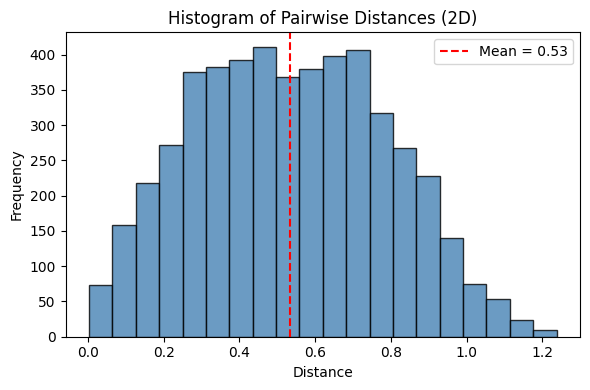

In [8]:
# 1.c)
plt.figure(figsize=(6, 4))
plt.hist(distances, bins=20, color='steelblue', edgecolor='black', alpha=0.8)
plt.axvline(mean_dist, color='red', linestyle='dashed', label=f'Mean = {mean_dist:.2f}')
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Histogram of Pairwise Distances (2D)")
plt.legend()
plt.tight_layout()
plt.show()


### 1d) Extending to d-dimensions

Now, let's consider the difference between picking a point located in a d-dimensional sphere vs in a d-dimensional cube. To do this, calculate and plot the the difference between the volume of a cube centered at the origin and going from [-1, 1] and the volume of a unit-radius sphere as the dimension d of the space increases. Possibly helpful formula: 

$$ Sphere: V_d = \frac{\pi^{d/2}}{\frac{d}{2} \Gamma(\frac{d}{2})} R^d$$ 

where R is the radius of the sphere.

$$ Cube: V_d = L^d $$

and L is the length of a side.


In [9]:
from scipy.special import gamma

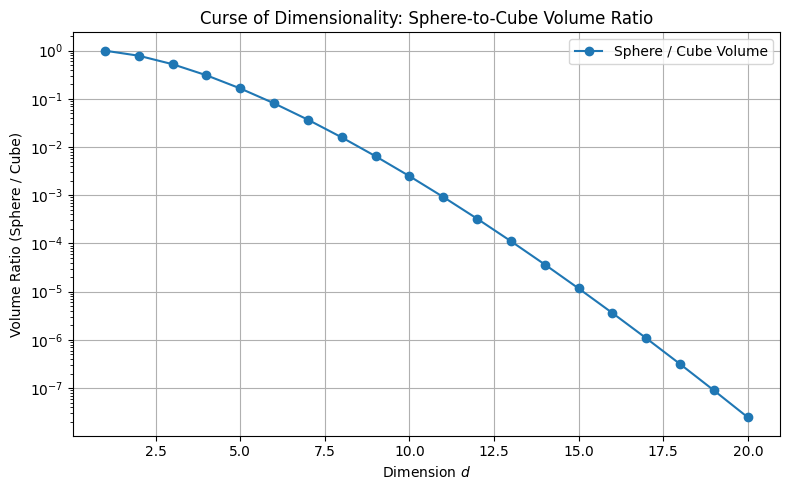

In [10]:
dimensions = np.arange(1, 21)

sphere_vol = np.array([np.pi**(d/2) / gamma(d/2 + 1) for d in dimensions])
cube_vol = np.array([2**d for d in dimensions])

volume_ratio = sphere_vol / cube_vol
volume_difference = cube_vol - sphere_vol

# Plot
plt.figure(figsize=(8, 5))
plt.plot(dimensions, volume_ratio, 'o-', label='Sphere / Cube Volume')
plt.yscale('log')
plt.xlabel("Dimension $d$")
plt.ylabel("Volume Ratio (Sphere / Cube)")
plt.title("Curse of Dimensionality: Sphere-to-Cube Volume Ratio")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 1e) Sampling in d-dimensions

Now, consider the problem of sampling in high-dimensions. If we use a uniform prior on every parameter, our expectation is that we will well sample the parameter space simply by picking in a "uniform way". Calculate the ratio of volume contained in an annulus between $R$ and $R - \epsilon$ for d = 1-20 and plot this. Interpret your result in terms of a sampling problem. Are uniform priors a good choice in higher dimensions? Why or why not?

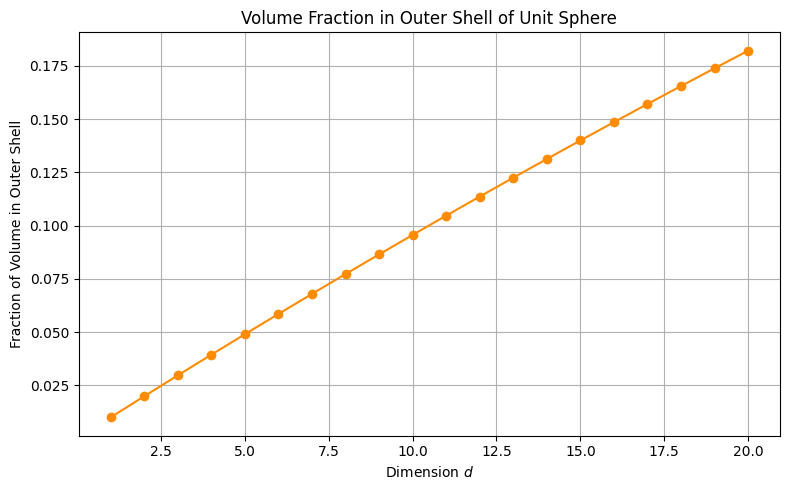

In [11]:
epsilon = 0.01
dimensions = np.arange(1, 21)

fraction_in_shell = 1 - (1 - epsilon)**dimensions

# Plot
plt.figure(figsize=(8, 5))
plt.plot(dimensions, fraction_in_shell, 'o-', color='darkorange')
plt.xlabel("Dimension $d$")
plt.ylabel("Fraction of Volume in Outer Shell")
plt.title("Volume Fraction in Outer Shell of Unit Sphere")
plt.grid(True)
plt.tight_layout()
plt.show()

**Uniform priors** are **NOT** a good choice in higher dimensions! Most of the volume lies in the outer shell/close to the edges of the shape/edge of dimensions. So the space is mostly empty in the center.